In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("quora_style_dataset_2000.csv")
df.shape

(2000, 6)

In [12]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,186300,279621,291575,Will there be a war between India and Pakistan?,Which is better: Java or Python?,0
1,186301,139681,102009,How do I remove water from ear?,What is the future of data science?,0
2,186302,115817,164934,What is GST and how does it benefit common peo...,How can I get venture capital for my startup?,0
3,186303,278464,236355,What are the differences between Android and iOS?,What are the differences between Android and iOS?,1
4,186304,243913,117538,What are the differences between Android and iOS?,How do you sleep well?,0


In [13]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
671,186971,157636,283123,Will there be a war between India and Pakistan?,What should I do to overcome anxiety?,0
885,187185,163446,154010,How can I motivate myself to achieve more?,How do I motivate myself to achieve more?,1
690,186990,243869,225248,What are the best books on modern philosophy?,How do you sleep well?,0
626,186926,119516,275249,How do you sleep well?,How do you sleep well?,1
146,186446,272332,292721,How can I motivate myself to achieve more?,How can I motivate myself to achieve more?,1
316,186616,123767,199059,Which is better: Java or Python?,Which is better: Java or Python?,1
1728,188028,195200,132104,How can I motivate myself to achieve more?,How can I motivate myself to achieve more?,1
191,186491,298468,154293,What are the differences between Android and iOS?,How do I remove water from ear?,0
1041,187341,180135,152254,What are the differences between Android and iOS?,What are the differences between Android and iOS?,1
1168,187468,111744,149235,What is GST and how does it benefit common peo...,What's GST and how does it benefit common people?,1


In [14]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            2000 non-null   int64 
 1   qid1          2000 non-null   int64 
 2   qid2          2000 non-null   int64 
 3   question1     2000 non-null   object
 4   question2     2000 non-null   object
 5   is_duplicate  2000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 93.9+ KB


In [15]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [16]:
# duplicate rows
df.duplicated().sum()

0

is_duplicate
1    1018
0     982
Name: count, dtype: int64
is_duplicate
1    50.9
0    49.1
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

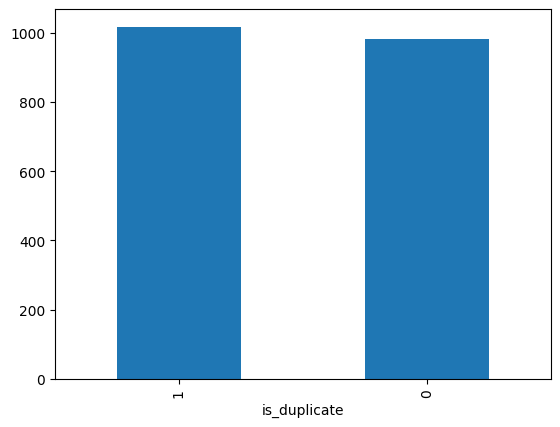

In [17]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [18]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 3950
Number of questions getting repeated 49


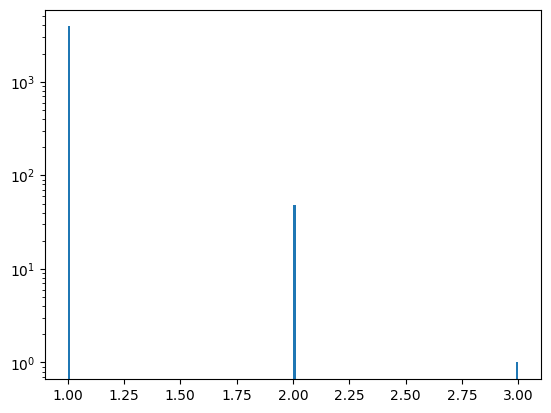

In [19]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

# ONLY BOW

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df2 = pd.read_csv("synthetic_question_pairs_3000.csv")
df2.shape

(3000, 6)

In [22]:
df2.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the best way to lose weight?,What is the best way to lose weight?,1
1,1,3,4,How can I build good habits?,How to improve communication skills?,0
2,2,5,6,What is the best way to save money?,How to start freelancing as a student?,0
3,3,7,8,How to start freelancing as a student?,What is Artificial Intelligence?,0
4,4,9,10,What are the symptoms of diabetes?,What is the future of electric vehicles?,0


In [23]:
df2.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [24]:
df2.duplicated().sum()

0

In [25]:
ques_df = df2[['question1','question2']]
ques_df.head()

,question1,question2
0,What is the best way to lose weight?,What is the best way to lose weight?
1,How can I build good habits?,How to improve communication skills?
2,What is the best way to save money?,How to start freelancing as a student?
3,How to start freelancing as a student?,What is Artificial Intelligence?
4,What are the symptoms of diabetes?,What is the future of electric vehicles?


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Ensure there are no NaN values in the data
ques_df['question1'] = ques_df['question1'].fillna("")
ques_df['question2'] = ques_df['question2'].fillna("")

# Assuming ques_df is a DataFrame with 'question1' and 'question2' columns
questions = list(ques_df['question1']) + list(ques_df['question2'])

# Initialize CountVectorizer with a limit on features
cv = CountVectorizer(max_features=3000)

# Fit and transform the merged text data
features = cv.fit_transform(questions).toarray()

# Validate the split index
split_index = len(ques_df['question1'])
assert features.shape[0] == 2 * split_index

q1_arr, q2_arr = np.vsplit(features, [split_index])


C:\Users\Dell\AppData\Local\Temp\ipykernel_25688\1444612300.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['question1'] = ques_df['question1'].fillna("")
C:\Users\Dell\AppData\Local\Temp\ipykernel_25688\1444612300.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['question2'] = ques_df['question2'].fillna("")


In [27]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(3000, 138)

In [28]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,1,1,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2996,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2998,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [29]:
temp_df['is_duplicate'] = df2['is_duplicate']

In [30]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,is_duplicate
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,1,0,0,0,1
1,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [33]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

# BOW_with_basic_features

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [35]:
df3 = pd.read_csv("synthetic_question_pairs_3000.csv")
df3.shape

(3000, 6)

In [36]:
df3.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the best way to lose weight?,What is the best way to lose weight?,1
1,1,3,4,How can I build good habits?,How to improve communication skills?,0
2,2,5,6,What is the best way to save money?,How to start freelancing as a student?,0
3,3,7,8,How to start freelancing as a student?,What is Artificial Intelligence?,0
4,4,9,10,What are the symptoms of diabetes?,What is the future of electric vehicles?,0


In [37]:
df3.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [38]:
df3.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the best way to lose weight?,What is the best way to lose weight?,1
1,1,3,4,How can I build good habits?,How to improve communication skills?,0
2,2,5,6,What is the best way to save money?,How to start freelancing as a student?,0
3,3,7,8,How to start freelancing as a student?,What is Artificial Intelligence?,0
4,4,9,10,What are the symptoms of diabetes?,What is the future of electric vehicles?,0


In [39]:
df3.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [40]:
df3.duplicated().sum()

0

is_duplicate
1    1555
0    1445
Name: count, dtype: int64
is_duplicate
1    51.833333
0    48.166667
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

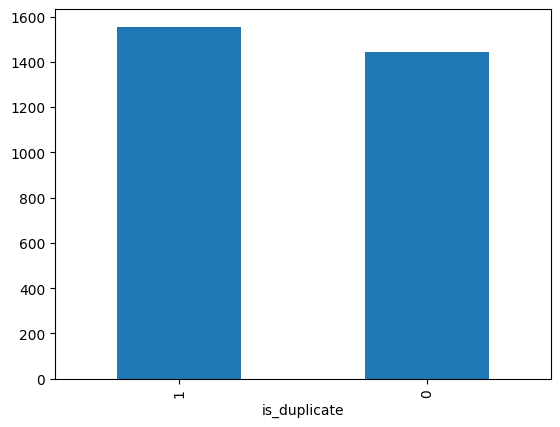

In [41]:
# Distribution of duplicate and non-duplicate questions

print(df3['is_duplicate'].value_counts())
print((df3['is_duplicate'].value_counts()/df2['is_duplicate'].count())*100)
df3['is_duplicate'].value_counts().plot(kind='bar')

In [42]:
# Repeated questions

qid = pd.Series(df3['qid1'].tolist() + df3['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 6000
Number of questions getting repeated 0


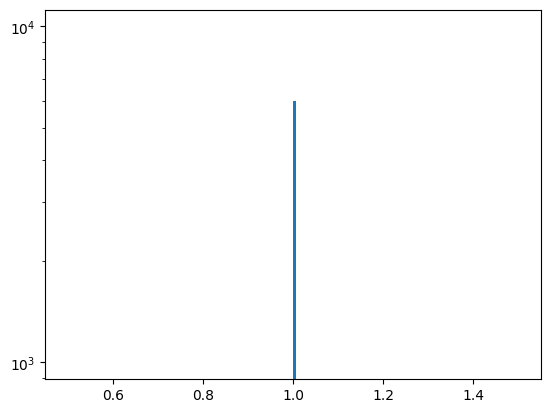

In [43]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [46]:
# Feature Engineering

df3['q1_len'] = df3['question1'].str.len()
df3['q2_len'] = df3['question2'].str.len()

In [47]:
df3.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
0,0,1,2,What is the best way to lose weight?,What is the best way to lose weight?,1,36,36
1,1,3,4,How can I build good habits?,How to improve communication skills?,0,28,36
2,2,5,6,What is the best way to save money?,How to start freelancing as a student?,0,35,38
3,3,7,8,How to start freelancing as a student?,What is Artificial Intelligence?,0,38,32
4,4,9,10,What are the symptoms of diabetes?,What is the future of electric vehicles?,0,34,40


In [48]:
df3['q1_num_words'] = df3['question1'].apply(lambda row: len(row.split(" ")))
df3['q2_num_words'] = df3['question2'].apply(lambda row: len(row.split(" ")))
df3.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
0,0,1,2,What is the best way to lose weight?,What is the best way to lose weight?,1,36,36,8,8
1,1,3,4,How can I build good habits?,How to improve communication skills?,0,28,36,6,5
2,2,5,6,What is the best way to save money?,How to start freelancing as a student?,0,35,38,8,7
3,3,7,8,How to start freelancing as a student?,What is Artificial Intelligence?,0,38,32,7,4
4,4,9,10,What are the symptoms of diabetes?,What is the future of electric vehicles?,0,34,40,6,7


In [49]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [50]:
df3['word_common'] = df3.apply(common_words, axis=1)
df3.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
0,0,1,2,What is the best way to lose weight?,What is the best way to lose weight?,1,36,36,8,8,8
1,1,3,4,How can I build good habits?,How to improve communication skills?,0,28,36,6,5,1
2,2,5,6,What is the best way to save money?,How to start freelancing as a student?,0,35,38,8,7,1
3,3,7,8,How to start freelancing as a student?,What is Artificial Intelligence?,0,38,32,7,4,0
4,4,9,10,What are the symptoms of diabetes?,What is the future of electric vehicles?,0,34,40,6,7,3


In [51]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [52]:
df3['word_total'] = df3.apply(total_words, axis=1)
df3.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
0,0,1,2,What is the best way to lose weight?,What is the best way to lose weight?,1,36,36,8,8,8,16
1,1,3,4,How can I build good habits?,How to improve communication skills?,0,28,36,6,5,1,11
2,2,5,6,What is the best way to save money?,How to start freelancing as a student?,0,35,38,8,7,1,15
3,3,7,8,How to start freelancing as a student?,What is Artificial Intelligence?,0,38,32,7,4,0,11
4,4,9,10,What are the symptoms of diabetes?,What is the future of electric vehicles?,0,34,40,6,7,3,13


In [53]:
df3['word_share'] = round(df3['word_common']/df3['word_total'],2)
df3.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,0,1,2,What is the best way to lose weight?,What is the best way to lose weight?,1,36,36,8,8,8,16,0.50
1,1,3,4,How can I build good habits?,How to improve communication skills?,0,28,36,6,5,1,11,0.09
2,2,5,6,What is the best way to save money?,How to start freelancing as a student?,0,35,38,8,7,1,15,0.07
3,3,7,8,How to start freelancing as a student?,What is Artificial Intelligence?,0,38,32,7,4,0,11,0.00
4,4,9,10,What are the symptoms of diabetes?,What is the future of electric vehicles?,0,34,40,6,7,3,13,0.23


minimum characters 18
maximum characters 53
average num of characters 33


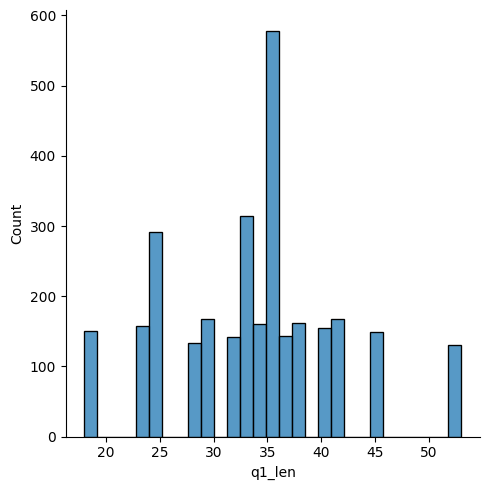

In [56]:
# Analysis of features
sns.displot(df3['q1_len'])
print('minimum characters',df3['q1_len'].min())
print('maximum characters',df3['q1_len'].max())
print('average num of characters',int(df3['q1_len'].mean()))

minimum characters 18
maximum characters 53
average num of characters 33


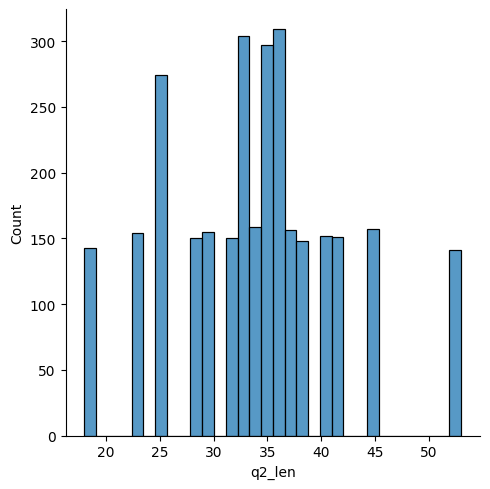

In [57]:
sns.displot(df3['q2_len'])
print('minimum characters',df3['q2_len'].min())
print('maximum characters',df3['q2_len'].max())
print('average num of characters',int(df3['q2_len'].mean()))

minimum words 4
maximum words 8
average num of words 6


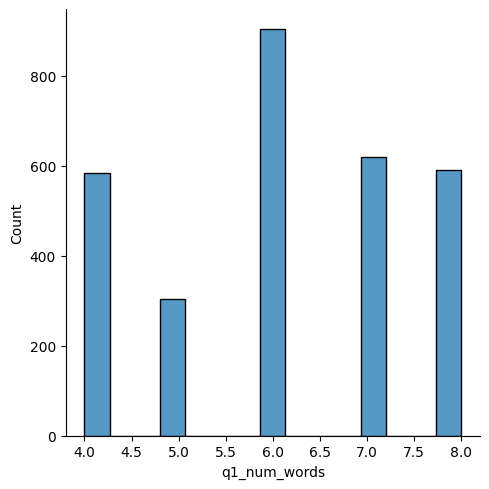

In [58]:
sns.displot(df3['q1_num_words'])
print('minimum words',df3['q1_num_words'].min())
print('maximum words',df3['q1_num_words'].max())
print('average num of words',int(df3['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


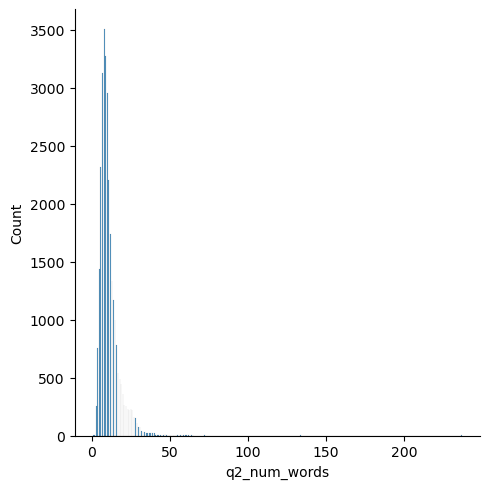

In [ ]:
sns.displot(new_df2['q2_num_words'])
print('minimum words',new_df2['q2_num_words'].min())
print('maximum words',new_df2['q2_num_words'].max())
print('average num of words',int(new_df2['q2_num_words'].mean()))

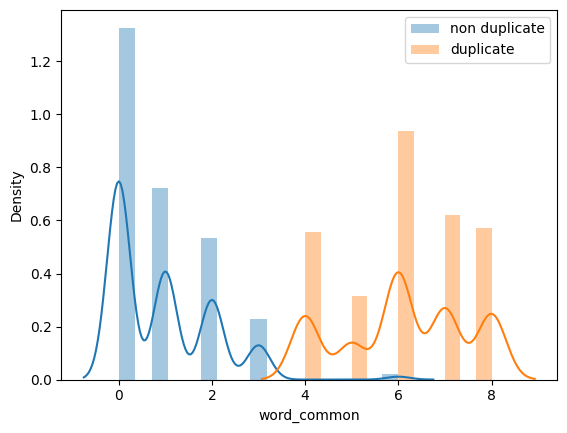

In [59]:
# common words
sns.distplot(df3[df3['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(df3[df3['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

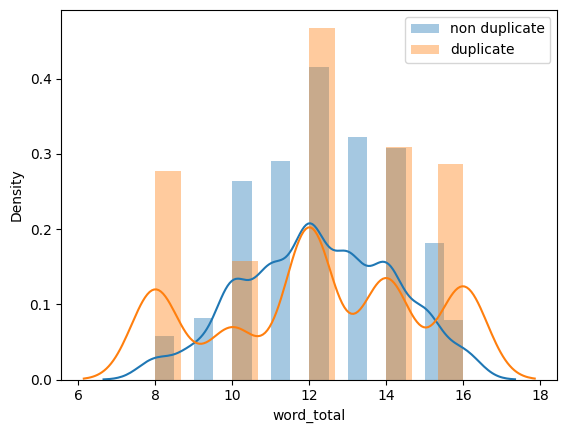

In [60]:
# Total words
sns.distplot(df3[df3['is_duplicate'] == 0]['word_total'], label='non duplicate')
sns.distplot(df3[df3['is_duplicate'] == 1]['word_total'], label='duplicate')
plt.legend()
plt.show()


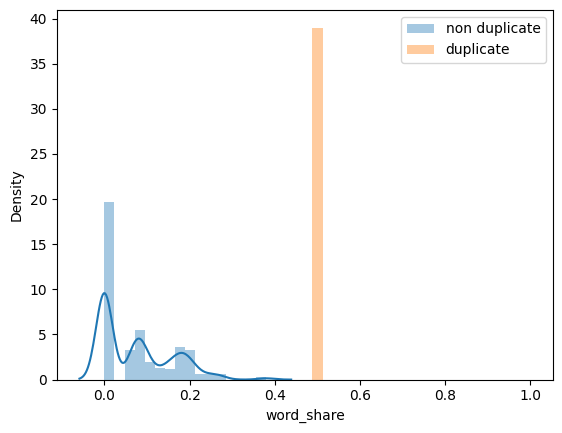

In [61]:
# word share
sns.distplot(df3[df3['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(df3[df3['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [62]:
ques_df2 = df3[['question1','question2']]
ques_df2.head()

,question1,question2
0,What is the best way to lose weight?,What is the best way to lose weight?
1,How can I build good habits?,How to improve communication skills?
2,What is the best way to save money?,How to start freelancing as a student?
3,How to start freelancing as a student?,What is Artificial Intelligence?
4,What are the symptoms of diabetes?,What is the future of electric vehicles?


In [63]:
final_df = df3.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(3000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,1,36,36,8,8,8,16,0.50
1,0,28,36,6,5,1,11,0.09
2,0,35,38,8,7,1,15,0.07
3,0,38,32,7,4,0,11,0.00
4,0,34,40,6,7,3,13,0.23


In [64]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Ensure there are no NaN values in the data
ques_df2['question1'] = ques_df2['question1'].fillna("")
ques_df2['question2'] = ques_df2['question2'].fillna("")

# Assuming ques_df is a DataFrame with 'question1' and 'question2' columns
questions2 = list(ques_df2['question1']) + list(ques_df2['question2'])

# Initialize CountVectorizer with a limit on features
cv = CountVectorizer(max_features=3000)

# Fit and transform the merged text data
features = cv.fit_transform(questions2).toarray()

# Validate the split index
split_index = len(ques_df2['question1'])
assert features.shape[0] == 2 * split_index

q1_arr, q2_arr = np.vsplit(features, [split_index])

In [65]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df2.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df2.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(3000, 138)

In [66]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(3000, 146)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,59,60,61,62,63,64,65,66,67,68
0,1,36,36,8,8,8,16,0.50,0,0,...,0,1,0,0,1,1,1,0,0,0
1,0,28,36,6,5,1,11,0.09,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,35,38,8,7,1,15,0.07,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,38,32,7,4,0,11,0.00,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,34,40,6,7,3,13,0.23,0,0,...,0,0,0,1,0,0,1,0,0,0


In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)
print("Project Submitted by nakul")

1.0